## Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

In [2]:
#Load required libraries and dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Point filepath to downloaded dataset and assign data files to data table.

In [3]:
df1 = pd.read_csv(r"C:\Users\Toyosi\Documents\Quantium\QVI_transaction_data.csv")
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
df2 = pd.read_csv(r"C:\Users\Toyosi\Documents\Quantium\QVI_purchase_behaviour.csv")
df2

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


### Examine data using Exploratory data analysis.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**No issue in df2 but in df1, an issue appears in the date column. The date column is in CSV/Excel integer format. To change to date format, we place origin at '1899-12-30'.**

In [7]:
df1['DATE'] = pd.to_datetime(df1['DATE'], unit='D', origin='1899-12-30')
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


**Verifying if the dataset contains the right products by examining column `PROD_NAME`**

In [8]:
df1['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [9]:
#Further categorization of prod_name for easy editing
df1['PROD_WEIGHT'] = df1['PROD_NAME'].str[-4:]
df1['PROD_WEIGHT']

0         175g
1         175g
2         170g
3         175g
4         150g
          ... 
264831    175g
264832    175g
264833    170g
264834    150g
264835    175g
Name: PROD_WEIGHT, Length: 264836, dtype: object

In [10]:
df1['PROD_WEIGHT'].value_counts()

175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
200g     4473
Salt     3257
250g     3169
210g     3167
210G     3105
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
150G     1498
180g     1468
175G     1461
125g     1454
Name: PROD_WEIGHT, dtype: int64

**Noticing some of the values for `PROD_WEIGHT` are off, the data is corrected.**

In [11]:
df1['PROD_WEIGHT'] = df1['PROD_WEIGHT'].replace({'Salt':'135g', '220G':'220g', '150G':'150g', '210G':'210g', '175G':'175g'})

In [12]:
#Verifying correction.
df1['PROD_WEIGHT'].value_counts()

175g    66390
150g    43131
134g    25102
110g    22387
170g    19983
165g    15297
300g    15166
330g    12540
380g     6418
270g     6285
210g     6272
200g     4473
135g     3257
250g     3169
 90g     3008
190g     2995
160g     2970
220g     1564
 70g     1507
180g     1468
125g     1454
Name: PROD_WEIGHT, dtype: int64

In [13]:
df1['PROD_NAME'] = df1['PROD_NAME'].str.strip()
df1['PROD_NAME']

0           Natural Chip        Compny SeaSalt175g
1                         CCs Nacho Cheese    175g
2           Smiths Crinkle Cut  Chips Chicken 170g
3           Smiths Chip Thinly  S/Cream&Onion 175g
4         Kettle Tortilla ChpsHny&Jlpno Chili 150g
                            ...                   
264831     Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of  Lime 175g
264833                    Doritos Mexicana    170g
264834     Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of  Lime 175g
Name: PROD_NAME, Length: 264836, dtype: object

In [14]:
#Creating a column for the brand name
df1['BRAND_NAME'] = df1['PROD_NAME'].str.split().str.get(0)
df1['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        28860
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

In [15]:
df1['BRAND_NAME'] = df1['BRAND_NAME'].replace({'Smith':'Smiths', 'Dorito':'Doritos', 'RRD':'RED', 
                                               'Infzns':'Infuzions', 'WW':'Woolworths', 'Snbts':'Sunbites', 
                                               'GrnWves':'Grain'})               

**There seems to be salsa products in the dataset. Since it is not a chip, let's remove it.**

In [16]:
index_drop = df1[df1['PROD_NAME'] == "Old El Palso Salsa"].index
df1 = df1.drop(index_drop)

**Cofirming salsa products were dropped.**

In [17]:
df1[df1['PROD_NAME'] == "Old El Palso Salsa"].count()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
PROD_WEIGHT       0
BRAND_NAME        0
dtype: int64

**Looking through the data.**

In [18]:
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


**Discovering an outlier in the maximum `PROD_QTY` and investigating.**

In [19]:
condition = df1[df1['PROD_QTY'] == 200]
condition

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT,BRAND_NAME
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380g,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380g,Doritos


### Dropping the outlier and re-examining transaction data.

In [20]:
df1 = df1.drop([69762, 69763])
df1 = df1.reset_index(drop=True)
df1.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


**Counting the number of transactions by date.**

In [21]:
counts_by_date = df1.groupby('DATE')['TXN_ID'].count().reset_index(name='transaction_count')
counts_by_date

,DATE,transaction_count
0,2018-07-01,724
1,2018-07-02,711
2,2018-07-03,722
3,2018-07-04,714
4,2018-07-05,712
...,...,...
359,2019-06-26,723
360,2019-06-27,709
361,2019-06-28,730
362,2019-06-29,745


**Plotting a graph of transactions over time.**

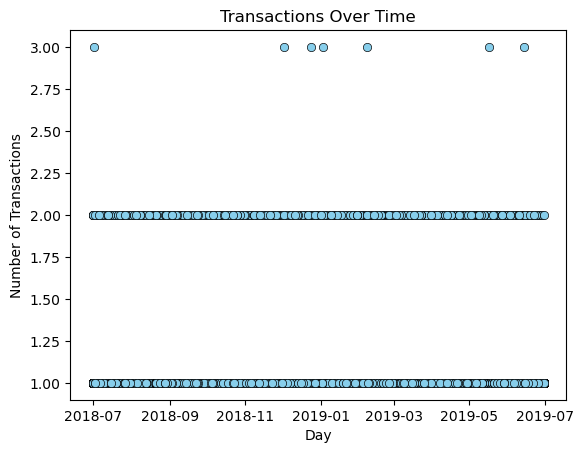

In [22]:
start_date = '2018-07-01'
end_date = '2019-06-30'

filtered_data = df1[(df1['DATE'] >= start_date) & (df1['DATE'] <= end_date)]
sns.scatterplot(x=filtered_data['DATE'], y=filtered_data['TXN_ID'].value_counts(), color="skyblue", edgecolor='black')
plt.title('Transactions Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

**Investigating the activities between '2018-12' and '2019-02'.**

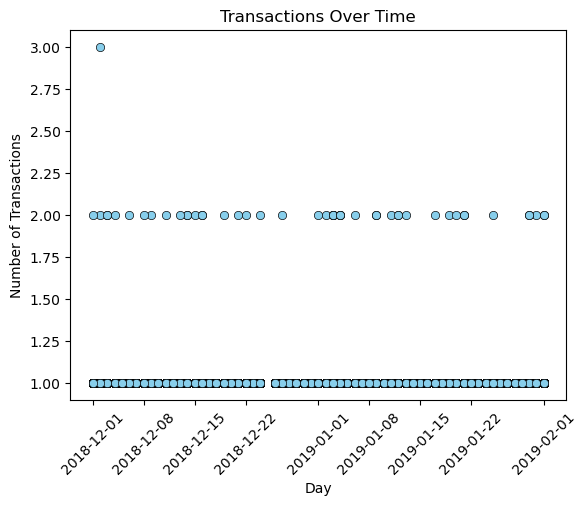

In [23]:
start_date1 = '2018-12'
end_date1 = '2019-02'

filtered_data1 = df1[(df1['DATE'] >= start_date1) & (df1['DATE'] <= end_date1)]

#plt.figure(figsize=(15, 6))
sns.scatterplot(x=filtered_data1['DATE'], y=filtered_data1['TXN_ID'].value_counts (), color="skyblue", edgecolor='black')
plt.xticks(rotation=45)
plt.title('Transactions Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

**Noticing and investigating a gap between '2018-12-22' and '2019-01-01'.**

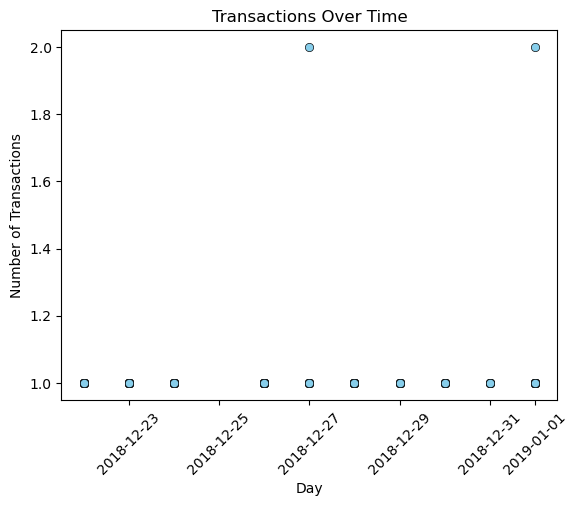

In [24]:
start_date2 = '2018-12-22'
end_date2 = '2019-01-01'

filtered_data2 = df1[(df1['DATE'] >= start_date2) & (df1['DATE'] <= end_date2)]

sns.scatterplot(x=filtered_data2['DATE'], y=filtered_data2['TXN_ID'].value_counts (), color="skyblue", edgecolor='black')
plt.xticks(rotation=45)
plt.title('Transactions Over Time')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.show()

**Noting a lack of transactions on '2018-12-25'.**

**Plotting a histogram showing the number of transactions by pack size**

In [25]:
PACK_SIZE = df1['PROD_WEIGHT'].str[0:3].astype(int)

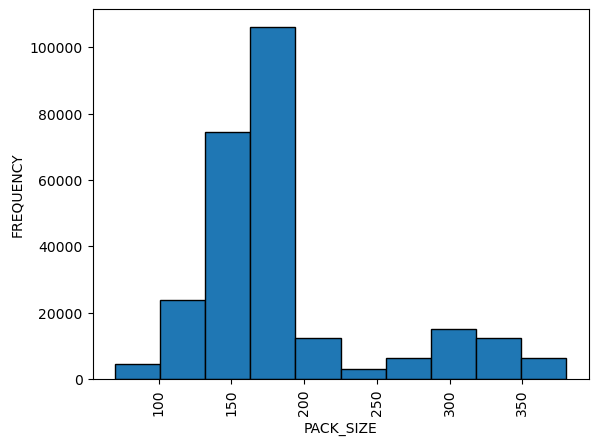

In [26]:
PACK_SIZE.plot(kind='hist', edgecolor='black')
plt.xticks(rotation=90)
#plt.title('Number of Transactions by pack size')
plt.xlabel('PACK_SIZE')
plt.ylabel('FREQUENCY')
plt.show()

In [27]:
Merged_df = pd.merge(df1, df2, how='left', on='LYLTY_CARD_NBR')
Merged_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,YOUNG SINGLES/COUPLES,Premium
264830,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,Tostitos,YOUNG SINGLES/COUPLES,Premium
264831,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,YOUNG SINGLES/COUPLES,Premium
264832,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,Doritos,YOUNG SINGLES/COUPLES,Premium


In [28]:
Merged_df.to_csv('QVI_complete_dataset.csv')

### Now we can define some metric of interest:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

**1. Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is.** 

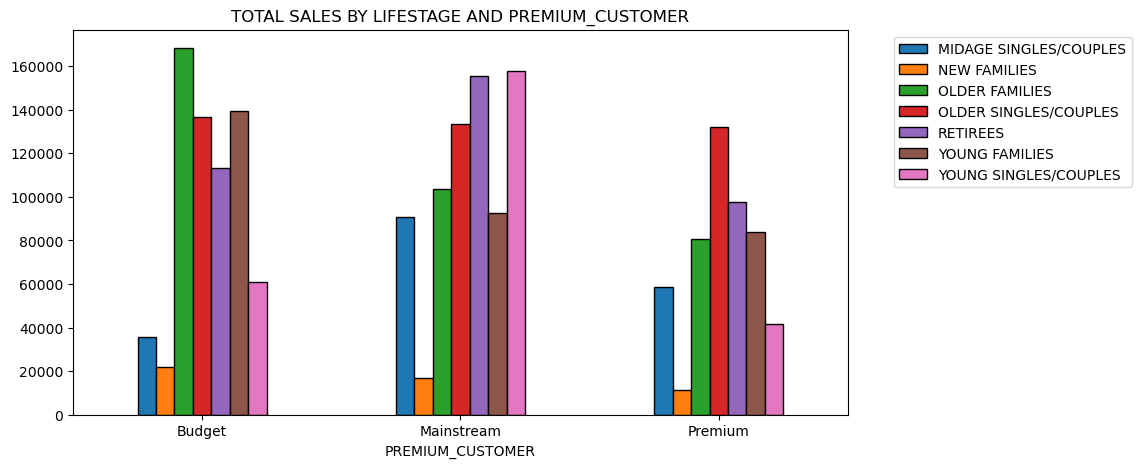

In [29]:
Sales = Merged_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].sum().unstack()
Sales.plot(kind='bar', edgecolor='black', figsize=(10, 5))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('TOTAL SALES BY LIFESTAGE AND PREMIUM_CUSTOMER')
plt.show()

**2. How many customers are in each segment?**

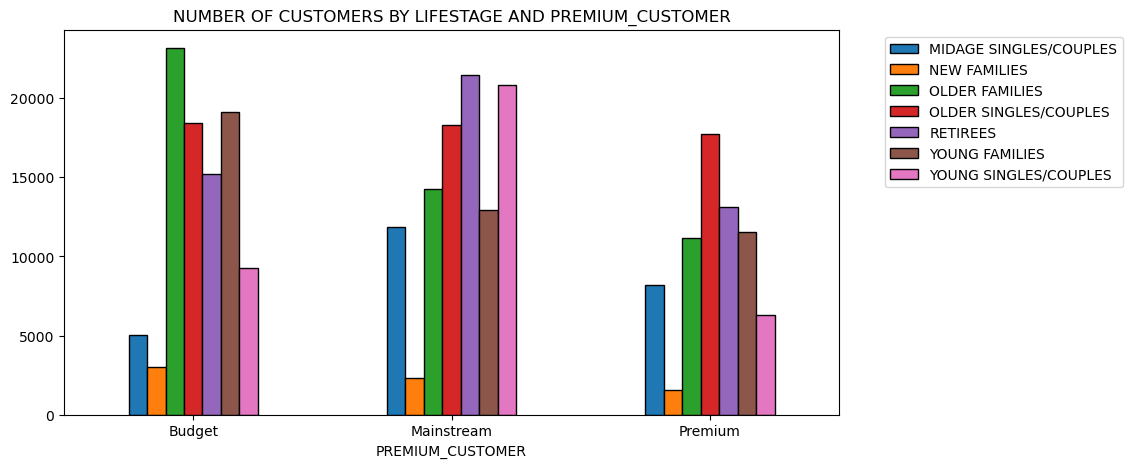

In [30]:
PC_VC = Merged_df.groupby('PREMIUM_CUSTOMER')['LIFESTAGE'].value_counts().unstack()
PC_VC.plot(kind='bar', edgecolor='black', figsize=(10, 5))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('NUMBER OF CUSTOMERS BY LIFESTAGE AND PREMIUM_CUSTOMER')
plt.show()

**3. How many chips are bought per customer by segment?**

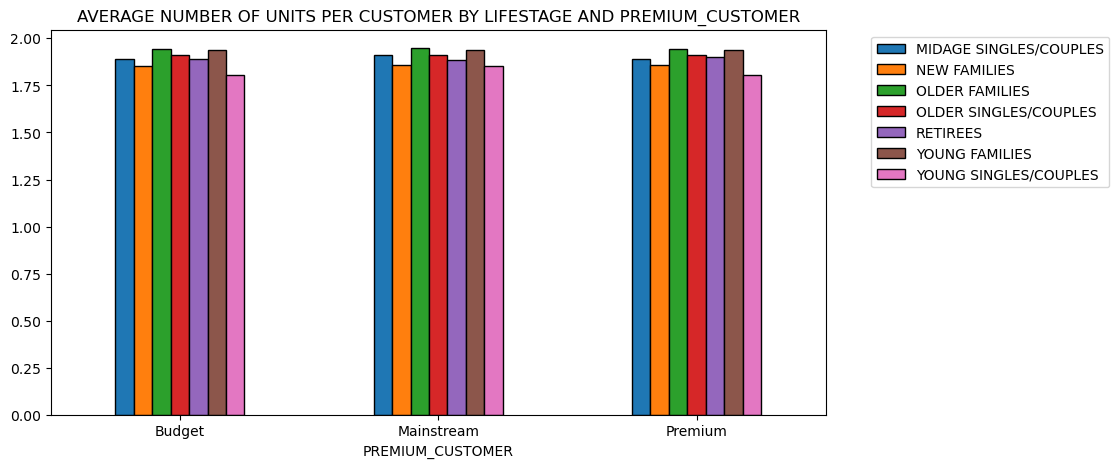

In [31]:
Sales = Merged_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_QTY'].mean().unstack()
Sales.plot(kind='bar', edgecolor='black', figsize=(10, 5))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('AVERAGE NUMBER OF UNITS PER CUSTOMER BY LIFESTAGE AND PREMIUM_CUSTOMER')
plt.show()

**4. What's the average chip price by customer segment?**

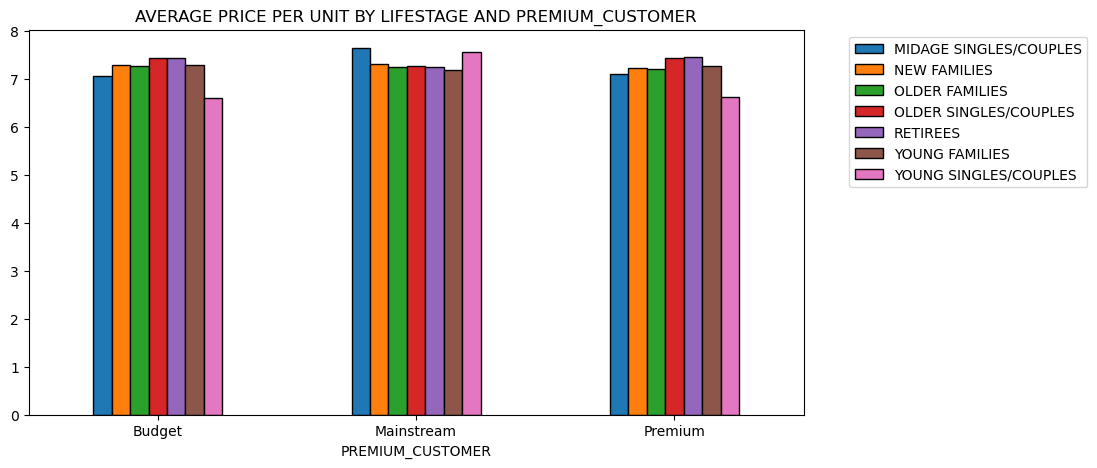

In [32]:
Sales = Merged_df.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['TOT_SALES'].mean().unstack()
Sales.plot(kind='bar', edgecolor='black', figsize=(10, 5))
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('AVERAGE PRICE PER UNIT BY LIFESTAGE AND PREMIUM_CUSTOMER')
plt.show()

### Perform an independent t-test between mainstream, premium, and budget midage and young singles/couples 

In [33]:
chips_midage_budget = Merged_df[(Merged_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (Merged_df['PREMIUM_CUSTOMER'] == 'Budget')]
chips_midage_mainstream = Merged_df[(Merged_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (Merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')]
chips_midage_premium = Merged_df[(Merged_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (Merged_df['PREMIUM_CUSTOMER'] == 'Premium')]
chips_young_budget = Merged_df[(Merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (Merged_df['PREMIUM_CUSTOMER'] == 'Budget')]
chips_young_mainstream = Merged_df[(Merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (Merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')]
chips_young_premium = Merged_df[(Merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (Merged_df['PREMIUM_CUSTOMER'] == 'Premium')]

In [34]:
from scipy.stats import ttest_ind
ttest_ind(chips_midage_budget['TOT_SALES'], chips_young_budget['TOT_SALES'])

TtestResult(statistic=9.90630215233554, pvalue=4.639561193629856e-23, df=14260.0)

In [35]:
ttest_ind(chips_midage_mainstream['TOT_SALES'], chips_young_mainstream['TOT_SALES'])

TtestResult(statistic=3.1081533917963857, pvalue=0.001884216157245504, df=32726.0)

In [36]:
ttest_ind(chips_midage_premium['TOT_SALES'], chips_young_premium['TOT_SALES'])

TtestResult(statistic=10.944928456221417, pvalue=9.025447000073563e-28, df=14495.0)

**This shows that the difference in the average price per unit between mainstream midage singles/couples and young singles/couples is significant.**

### Deep dive into mainstream, young singles/couples.

In [37]:
Merged_df['BRAND_NAME'] = df1['BRAND_NAME'] 

In [38]:
chips_midage_mainstream = Merged_df[(Merged_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (Merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')]
Mainstream_midage = pd.DataFrame(chips_midage_mainstream)
Mainstream_midage

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_WEIGHT,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
5021,2019-05-18,3,3159,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170g,Doritos,MIDAGE SINGLES/COUPLES,Mainstream
5022,2019-05-16,3,3294,2370,51,Doritos Mexicana 170g,2,8.8,170g,Doritos,MIDAGE SINGLES/COUPLES,Mainstream
5023,2018-08-18,4,4187,3492,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,Kettle,MIDAGE SINGLES/COUPLES,Mainstream
5024,2019-05-19,4,4264,3841,47,Doritos Corn Chips Original 170g,2,8.8,170g,Doritos,MIDAGE SINGLES/COUPLES,Mainstream
5025,2018-08-19,7,7036,6447,114,Kettle Sensations Siracha Lime 150g,1,4.6,150g,Kettle,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...,...
16890,2018-07-26,272,272244,269987,2,Cobs Popd Sour Crm &Chives Chips 110g,2,7.6,110g,Cobs,MIDAGE SINGLES/COUPLES,Mainstream
16891,2018-11-19,272,272244,269988,71,Twisties Cheese Burger 250g,2,8.6,250g,Twisties,MIDAGE SINGLES/COUPLES,Mainstream
16892,2019-04-22,272,272269,270015,30,Doritos Corn Chips Cheese Supreme 170g,2,8.8,170g,Doritos,MIDAGE SINGLES/COUPLES,Mainstream
16893,2019-02-10,272,272281,270037,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,150g,Kettle,MIDAGE SINGLES/COUPLES,Mainstream


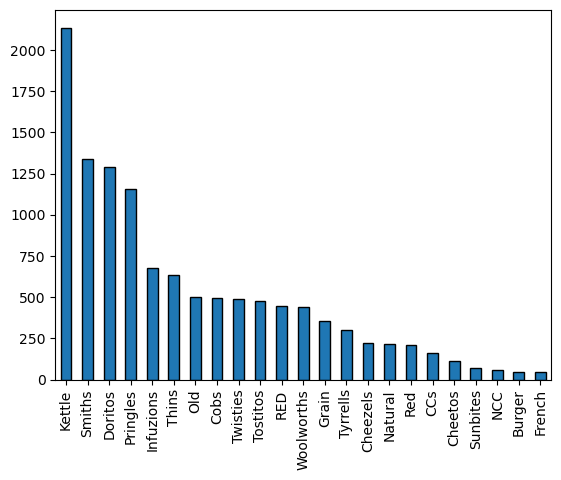

In [39]:
Brand = Mainstream_midage['BRAND_NAME'].value_counts()
Brand.plot(kind= 'bar', edgecolor='black')
plt.xticks(rotation=90)
plt.show()

**We can see that the Kettle brand is preferred.**

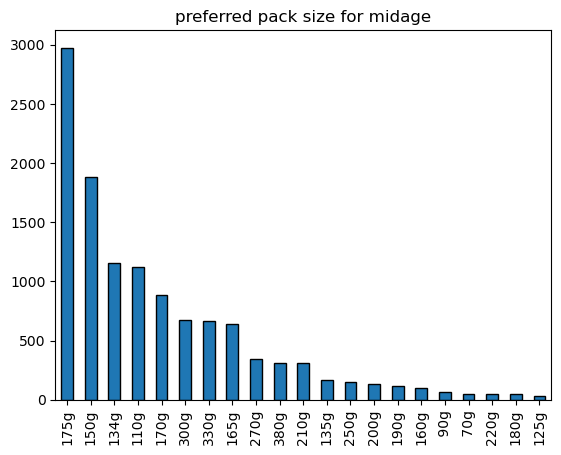

In [40]:
Mainstream_midage['PROD_WEIGHT'].value_counts().plot(kind= 'bar', edgecolor='black')
plt.xticks(rotation=90)
plt.title('preferred pack size for midage')
plt.show()

**Preferred pack size is 175g.**

### Preferred pack size compared to the rest of the population.

In [43]:
weigh = Merged_df[Merged_df['PROD_WEIGHT'] == '175g']
new_weigh = pd.DataFrame(weigh)
new_weigh['PROD_WEIGHT'] = new_weigh['PROD_WEIGHT'].str[0:3].astype(int) 

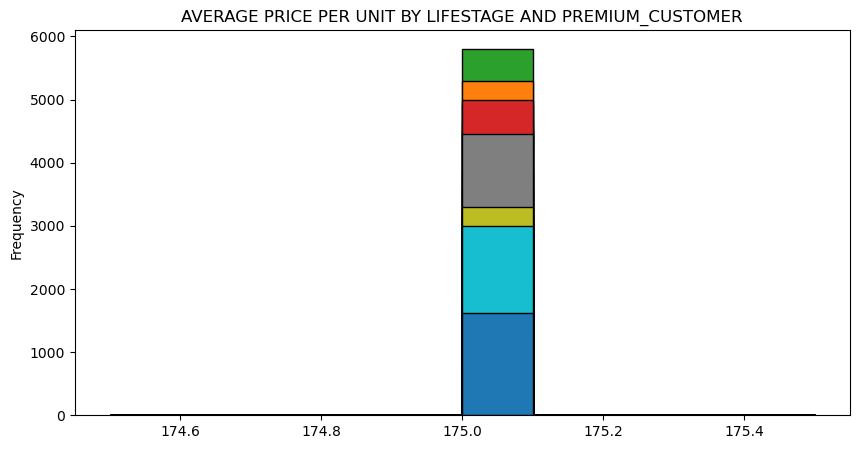

In [45]:
filter = new_weigh.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_WEIGHT']
filter.plot(kind='hist', edgecolor='black', figsize=(10, 5))
plt.xticks(rotation=0)
plt.title('AVERAGE PRICE PER UNIT BY LIFESTAGE AND PREMIUM_CUSTOMER')
plt.show()